In [1]:
import pandas as pd

steps=pd.read_csv("../data/scalati.csv.gz")[["uuid","date","user_minmax_steps", 'nbawake', 'sleepduration', 'lightduration', 'deepduration']].dropna()

In [81]:
def sleep_score(x):
    optimal_light_ratio=.5
    optimal_deep_ratio=.25
    
    x["sleep_quality_score"] = (1 - abs(x["lightduration"]/x["sleepduration"] - optimal_light_ratio)) * (1- abs(x["deepduration"]/x["sleepduration"] - optimal_deep_ratio)) * (1-abs(x["sleepduration"]/7.5-1))
    return x

steps = steps.transform(sleep_score)

nbawake 1.9682025554851696


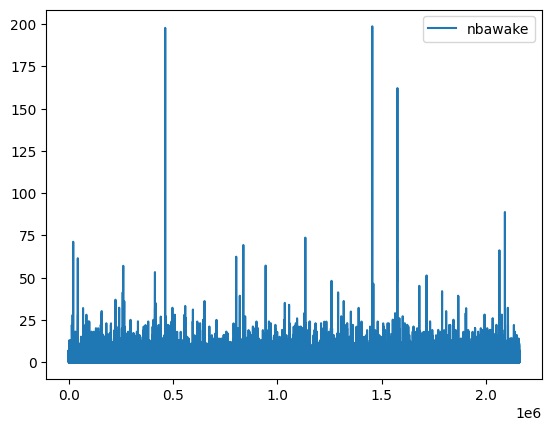

sleepduration 1.7370567943039223


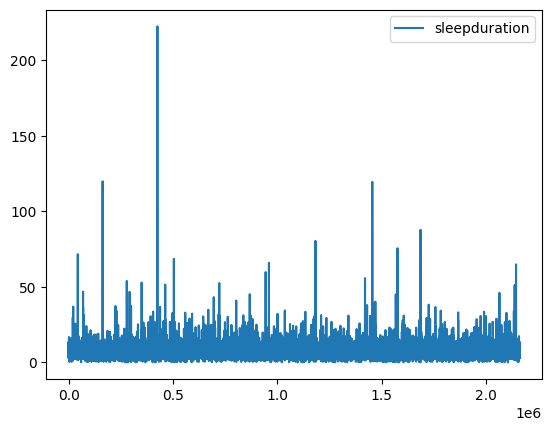

lightduration 1.3266850265843735


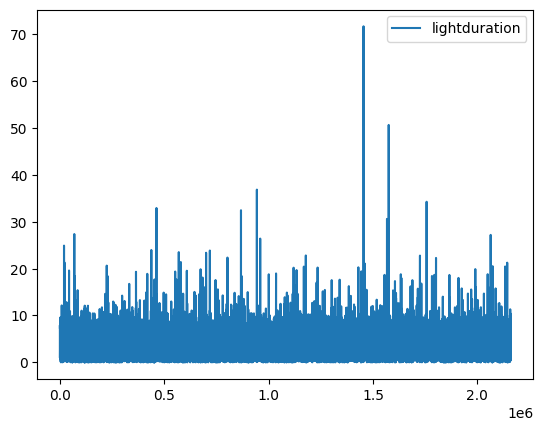

deepduration 1.2827507329078667


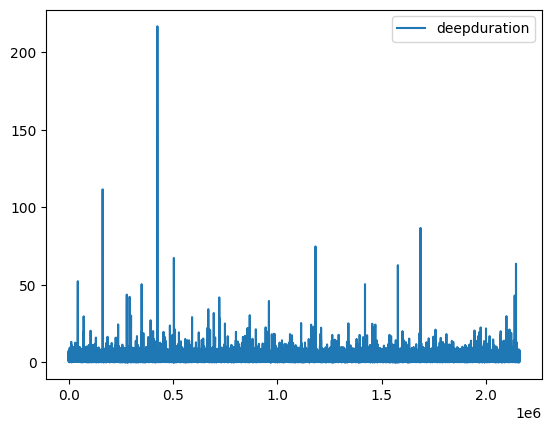

sleep_quality_score 0.1464968510647307


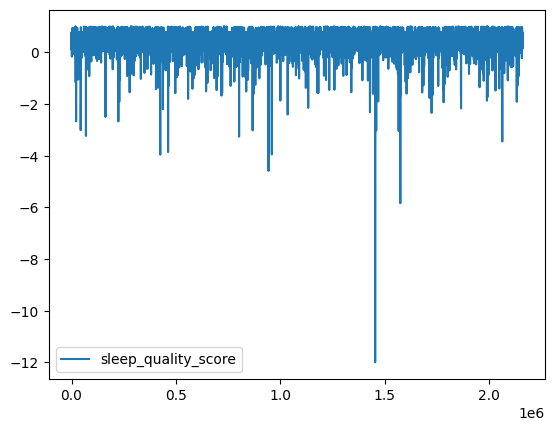

In [82]:
for feature in steps.columns[3:]:
    steps[[feature]].plot()
    print(feature,steps[feature].std())
    plt.show()
    plt.close()

In [83]:
steps[["uuid","date","user_minmax_steps","sleep_quality_score"]]

,uuid,date,user_minmax_steps,sleep_quality_score
1,1003e58667235e01b49008155604980b3900b00e,2016-08-01,0.239404,0.374103
4,1003e58667235e01b49008155604980b3900b00e,2016-08-04,0.123650,0.215298
10,1003e58667235e01b49008155604980b3900b00e,2016-08-10,0.407999,0.594053
15,1003e58667235e01b49008155604980b3900b00e,2016-08-15,0.480538,0.732081
25,1003e58667235e01b49008155604980b3900b00e,2016-09-01,0.091069,0.199874
...,...,...,...,...
2160167,fffd4caa4a492ac7659eb075df52755ee36122a3,2016-08-27,0.317101,0.488813
2160168,fffd4caa4a492ac7659eb075df52755ee36122a3,2016-08-28,0.663808,0.270755
2160169,fffd4caa4a492ac7659eb075df52755ee36122a3,2016-08-29,0.327724,0.418937
2160173,fffd4caa4a492ac7659eb075df52755ee36122a3,2016-09-02,0.568671,0.383557


In [84]:
steps[["uuid","date","user_minmax_steps","sleep_quality_score"]].to_csv("../data/valutati.csv.gz",compression="gzip", index=False)